In [1]:
# LOGISTIC REGRESSION MULTICLASS CLASSIFICATION

In [2]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

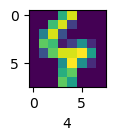

In [5]:
def plot_figure(index):
    plt.figure(figsize=(1,1))
    plt.imshow(digits.images[index])
    plt.xlabel(digits.target[index])
    
plot_figure(110)

In [6]:
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df.shape

(1797, 64)

In [8]:
df['target'] = digits.target
df.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [9]:
X = df.drop('target', axis='columns')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, df.target, test_size=0.2)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
model.predict(X_test)

array([6, 8, 3, 3, 6, 9, 7, 6, 7, 6, 9, 2, 2, 0, 4, 7, 6, 5, 2, 8, 3, 6,
       1, 2, 2, 2, 0, 4, 9, 7, 7, 4, 9, 5, 9, 1, 2, 7, 5, 9, 1, 8, 6, 0,
       6, 9, 4, 4, 0, 9, 7, 5, 0, 0, 8, 9, 0, 8, 3, 2, 7, 2, 6, 7, 8, 2,
       9, 6, 5, 9, 5, 1, 4, 2, 3, 5, 2, 3, 1, 1, 5, 5, 4, 3, 9, 3, 1, 6,
       7, 3, 0, 1, 4, 2, 1, 0, 3, 8, 0, 4, 9, 1, 6, 8, 7, 7, 4, 0, 7, 3,
       6, 0, 7, 8, 2, 4, 6, 1, 2, 5, 4, 3, 0, 5, 2, 9, 2, 9, 1, 0, 9, 7,
       8, 2, 7, 9, 8, 3, 2, 3, 7, 9, 9, 2, 3, 0, 6, 3, 0, 4, 5, 5, 4, 2,
       4, 0, 3, 6, 6, 6, 9, 7, 7, 2, 9, 2, 0, 6, 4, 4, 7, 4, 6, 7, 1, 8,
       5, 6, 1, 9, 4, 6, 3, 5, 0, 5, 3, 4, 3, 6, 0, 5, 1, 1, 8, 9, 8, 6,
       3, 7, 1, 4, 6, 4, 9, 2, 5, 0, 9, 9, 8, 6, 0, 1, 0, 4, 3, 3, 1, 6,
       3, 8, 3, 5, 0, 6, 4, 0, 0, 1, 2, 0, 1, 3, 3, 5, 3, 5, 8, 6, 6, 5,
       6, 9, 2, 9, 9, 4, 9, 0, 7, 5, 4, 9, 5, 6, 5, 1, 7, 0, 8, 0, 0, 9,
       8, 7, 3, 5, 1, 4, 9, 9, 1, 0, 2, 0, 7, 1, 5, 3, 6, 3, 5, 7, 2, 3,
       4, 7, 5, 4, 9, 6, 2, 5, 5, 5, 4, 9, 5, 9, 2,

In [13]:
y_test

1093    6
383     8
859     3
1566    3
750     6
       ..
1260    3
1047    8
299     7
673     7
124     4
Name: target, Length: 360, dtype: int32

In [17]:
model.score(X_test, y_test)

0.9638888888888889

In [30]:
model.predict([digits.data[558]])

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

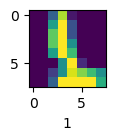

In [33]:
plot_figure(558)

In [37]:
y_pred = model.predict(X_test)

# CONFUSION MATRIX

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  1,  0, 23,  1],
       [ 1,  0,  0,  1,  0,  1,  0,  0,  0, 47]], dtype=int64)

## FOR BETTER UNDERSTANDING OF CONFUSION MATRIX WE HAVE SEABORN LIBRARY

Text(45.722222222222214, 0.5, 'Truth')

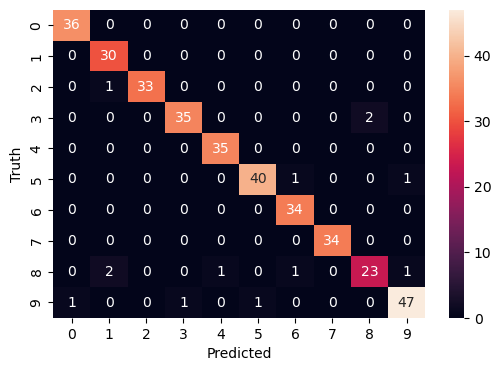

In [50]:
import seaborn as sb
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")